# Diamond_price

### import

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### Read_CSV

In [89]:
train = pd.read_csv('../data/diamonds_train.csv')
train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [90]:
test = pd.read_csv('../data/diamonds_test.csv')
test.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.73,Ideal,G,VVS2,61.9,55.0,5.83,5.77,3.59
1,0.61,Premium,F,VVS2,59.7,58.0,5.56,5.53,3.31
2,1.55,Premium,I,VS1,58.2,60.0,7.69,7.59,4.45
3,0.46,Good,F,IF,56.2,61.0,5.16,5.24,2.92
4,1.10,Very Good,F,VS2,60.6,58.0,6.67,6.77,4.07


In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [92]:
train.describe()

,carat,depth,table,price,x,y,z
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.799444,61.753006,57.457830,3944.805440,5.734403,5.737956,3.541056
std,0.475173,1.431088,2.232092,3997.938105,1.123077,1.145579,0.707065
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2410.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5351.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


(7.5, -0.5)

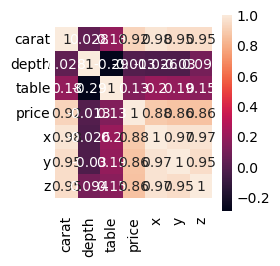

In [93]:
#fig, ax = plt.subplots(1, 1, figsize=(5, 5))
train_data=train.corr()
ax = sns.heatmap(train.corr(),annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [94]:
train.drop(train.query("x==0 or y==0 or z==0").index,inplace=True)

In [95]:
train.drop(train.query("z>10 or y>10").index,inplace=True)

In [96]:
train.describe()

,carat,depth,table,price,x,y,z
count,49977.000000,49977.000000,49977.000000,49977.000000,49977.000000,49977.000000,49977.000000
mean,0.798979,61.753002,57.457566,3942.188307,5.734568,5.736457,3.541388
std,0.474085,1.430676,2.231617,3994.659449,1.120323,1.112165,0.692019
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2409.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5347.000000,6.540000,6.540000,4.040000
max,4.130000,79.000000,95.000000,18823.000000,10.020000,9.940000,6.430000


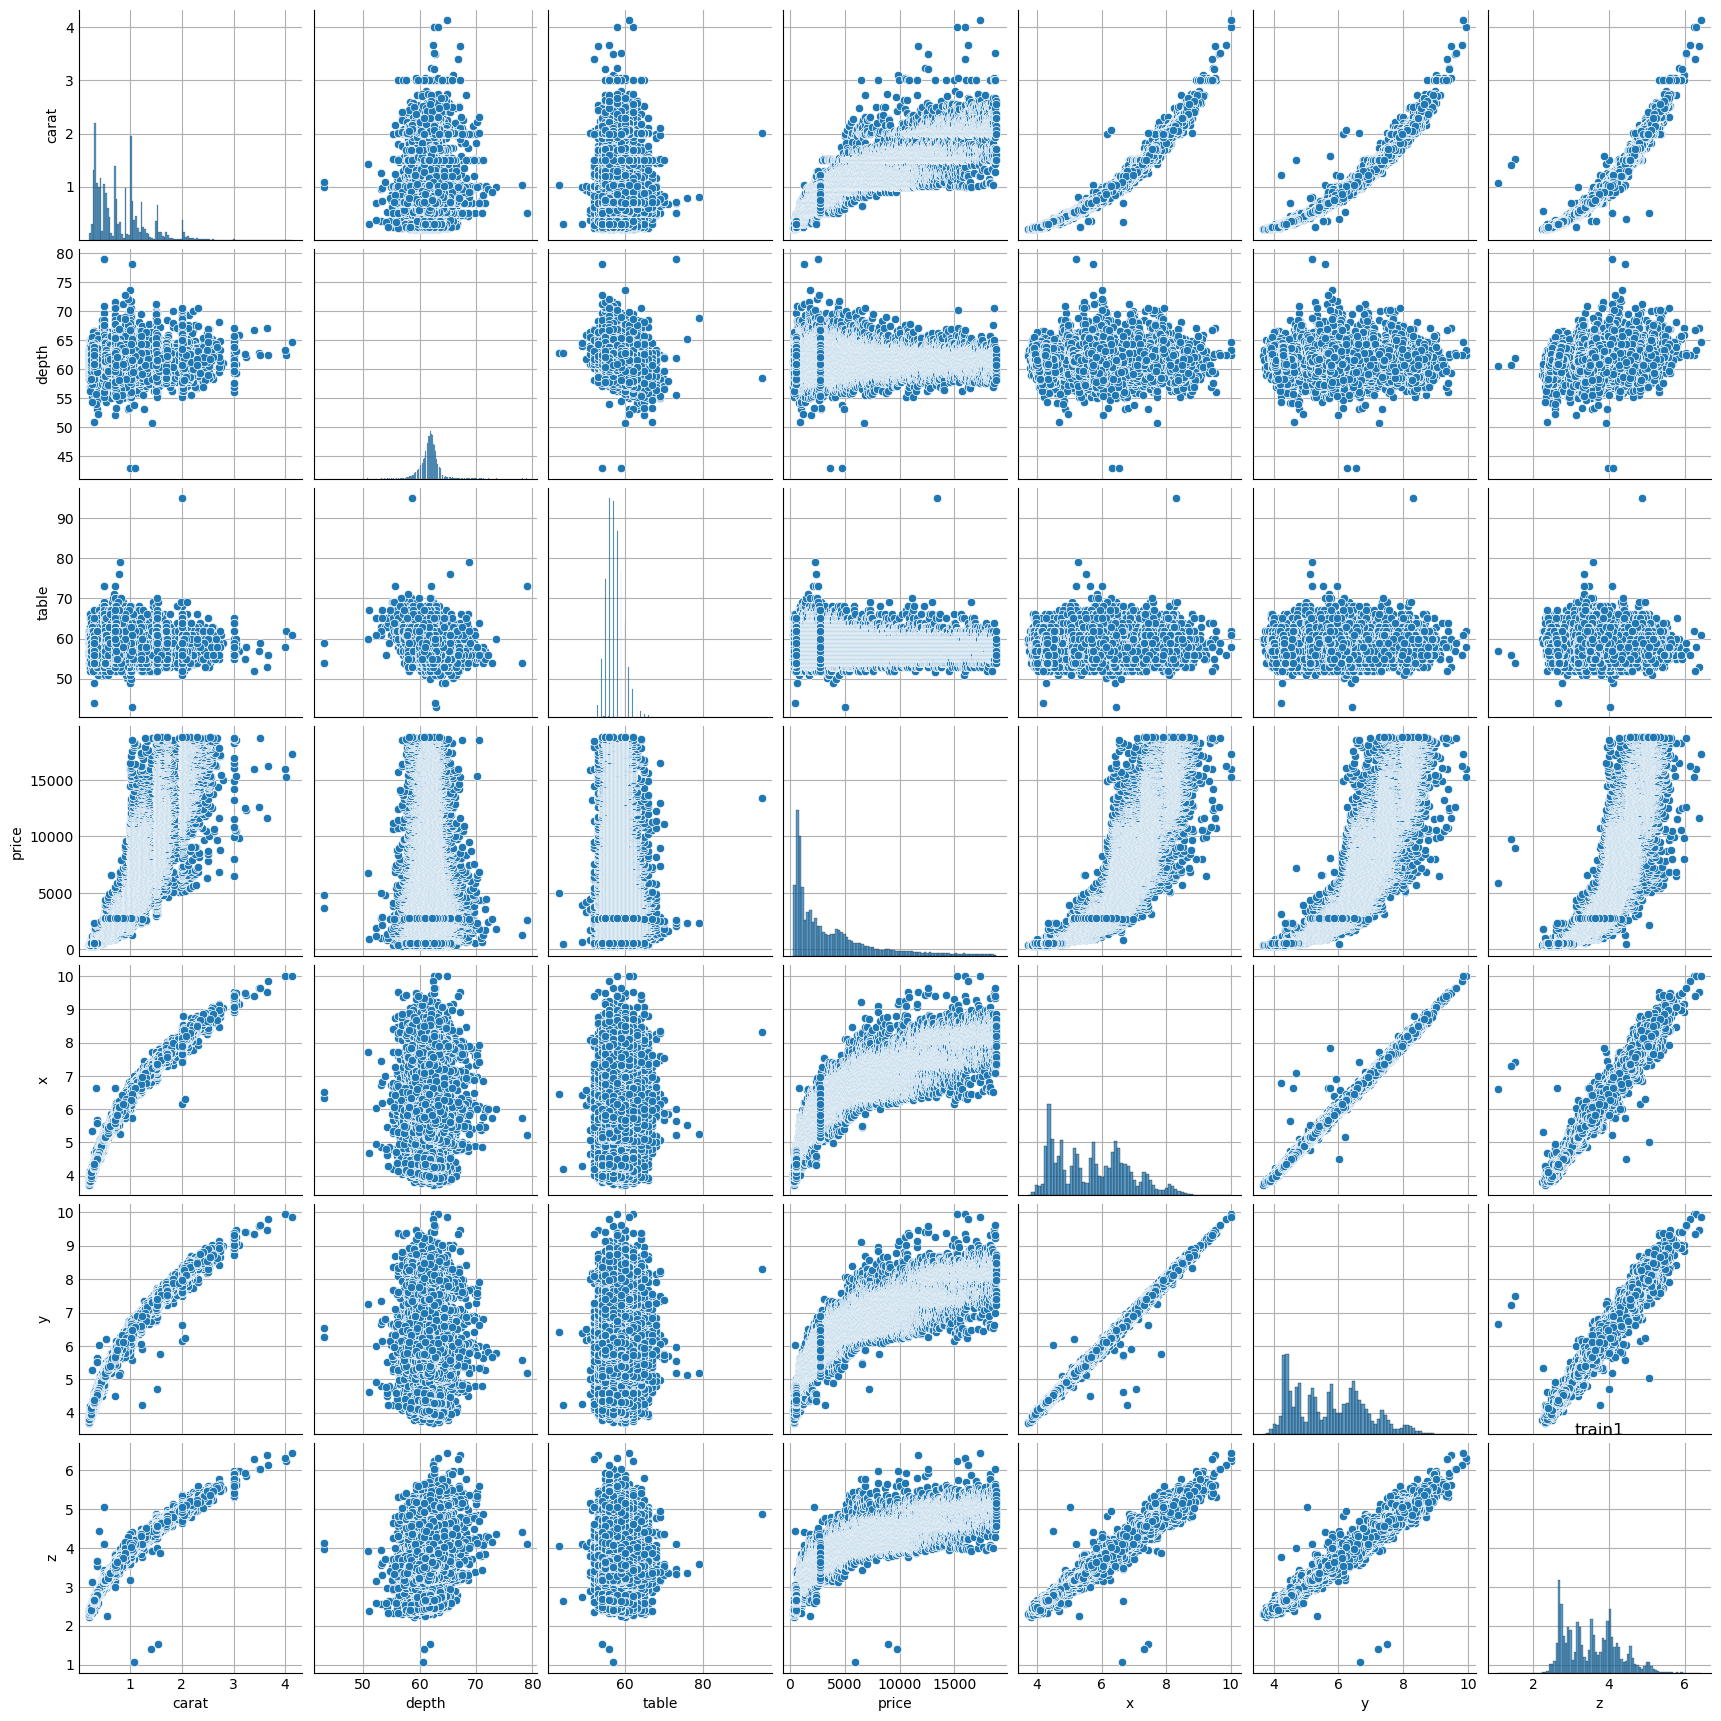

In [97]:
import seaborn as sb
import matplotlib.pyplot as plt

sb.pairplot(train)
plt.title("train1")
plt.show()

### encoder

In [98]:
mapping = {'I1':0,
          'SI2':1,
          'SI1':2,
          'VS2':3,
          'VS1':4,
          'VVS2':5,
          'VVS1':6,
          'IF':7}

map_cut = {'Fair':0,
          'Good':1,
          'Very Good':2,
          'Premium':3,
          'Ideal':4}

train.clarity = train.clarity.map(mapping)

test.clarity = test.clarity.map(mapping)

train.cut = train.cut.map(map_cut)
test.cut = test.cut.map(map_cut)


In [99]:
color_encodeing = {
    "D" : 6,
    "E" : 5,
    "F" : 4,
    "G" : 3,
    "H" : 2,
    "I" : 1,
    "J" : 0,
}

train['color'].replace(color_encodeing, inplace=True)
train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75


In [100]:
test['cut'].replace(map_cut, inplace=True)
test['color'].replace(color_encodeing, inplace=True)
test['clarity'].replace(mapping, inplace=True)
test.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.73,4,3,5,61.9,55.0,5.83,5.77,3.59
1,0.61,3,4,5,59.7,58.0,5.56,5.53,3.31
2,1.55,3,1,4,58.2,60.0,7.69,7.59,4.45
3,0.46,1,4,7,56.2,61.0,5.16,5.24,2.92
4,1.10,2,4,3,60.6,58.0,6.67,6.77,4.07


In [101]:
train.drop(train.query("x==0 or y==0 or z==0").index,inplace=True)

In [102]:
train.drop(train.query("z>10 or y>10").index,inplace=True)

### Modeling

* using

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train,X_val,Y_train,Y_val=train_test_split(train.drop('price',axis=1),train.price,test_size=.2,random_state=313)

model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

## Assessment

In [104]:
from sklearn.metrics import r2_score

Y_predicet = model.predict(X_val)
print("score model predict : ",r2_score(Y_val,Y_predicet)*100)

score model predict :  90.47520567764703


## predict

* predict dataframe test_data
* we want predict test_data which will create variable target for us.(price)

In [105]:
test_pred_price_df = pd.DataFrame()
test_pr_price = model.predict(test)
test_pred_price_df['price']=test_pr_price
test_pred_price_df

,price
0,3966.389212
1,3247.417328
2,10251.438468
3,3036.047445
4,6660.861227
...,...
3935,10453.180250
3936,4887.310978
3937,6796.180978
3938,10671.552473


In [106]:
test['price']=test_pr_price
test

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.73,4,3,5,61.9,55.0,5.83,5.77,3.59,3966.389212
1,0.61,3,4,5,59.7,58.0,5.56,5.53,3.31,3247.417328
2,1.55,3,1,4,58.2,60.0,7.69,7.59,4.45,10251.438468
3,0.46,1,4,7,56.2,61.0,5.16,5.24,2.92,3036.047445
4,1.10,2,4,3,60.6,58.0,6.67,6.77,4.07,6660.861227
...,...,...,...,...,...,...,...,...,...,...
3935,1.58,3,1,4,61.1,59.0,7.52,7.44,4.57,10453.180250
3936,1.00,2,4,2,63.1,59.0,6.29,6.22,3.95,4887.310978
3937,1.13,3,2,4,58.9,58.0,6.81,6.78,4.00,6796.180978
3938,1.51,4,5,3,62.8,56.0,7.31,7.24,4.57,10671.552473


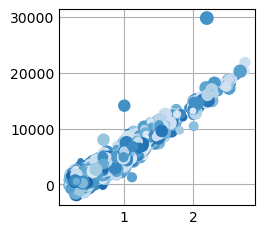

In [110]:
plt.style.use('_mpl-gallery')

fig, ax = plt.subplots()


sizes = np.random.uniform(15, 80, len(test['carat']))
colors = np.random.uniform(15, 80, len(test['carat']))

ax.scatter(test['carat'], test['price'], s=sizes, c=colors, vmin=0, vmax=100)


<Figure size 8000x16000 with 0 Axes>

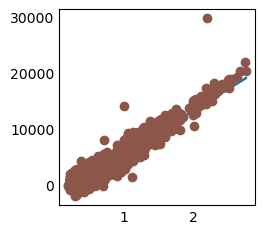

In [139]:
fig=plt.figure(figsize=(100,200),dpi=80) 

x=np.array(test['carat'])
y=np.array(test['price'])

a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
y_err = x.std() * np.sqrt(1/len(x) +
                          (x - x.mean())**2 / np.sum((x - x.mean())**2))


fig, ax = plt.subplots()
ax.plot(x, y_est, '-')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
ax.plot(x, y, 'o', color='tab:brown')

plt.show()